# Transfer learning with deep convolutional neural network for liver steatosis assessment in ultrasound images
Reproduce Results of [Transfer learning with deep convolutional neural network for liver steatosis assessment in ultrasound images](https://pubmed.ncbi.nlm.nih.gov/30094778/)


> We used a pre-trained CNN to extract features based on B-mode images. Next, using the neural features, we employed the support vector machine (SVM) algorithm to classify images containing fatty liver. Aside of fatty liver classification, it is clinically relevant to quantify the grade of liver steatosis. For this task, we used the extracted features and the Lasso regression method. In both cases, liver biopsy results served as a reference. The performance of the pro- posed approach was compared with the GLCM methods.





In [9]:
from scipy.io import loadmat
from pprint import pprint
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import pickle

In [10]:
M, N= 434, 636 # ultrasound image dimension

## Import Dataset of B-mode fatty liver ultrasound images

This notebook shows how to convert the dataset_liver_bmodes_steatosis_assessment_IJCARS.mat dataset.

Download the [dataset](https://www.kaggle.com/shanecandoit/dataset-of-bmode-fatty-liver-ultrasound-images?select=Byra2018_Article_TransferLearningWithDeepConvol.pdf.) first. 


> Our study involved 55 severely obese patients (mean age 40.1 ± 9.1, mean BMI 45.9 ± 5.6, 20% of males) admitted for bariatric surgery (laparoscopic sleeve gastrectomy). The ultrasound data were acquired using the GE Vivid E9 Ultrasound System (GE Healthcare INC, Horten, Nor- way) equipped with a sector probe operating at 2.5 MHz. The default general abdominal preset with harmonic imag- ing was used.










> The fatty liver was defined to have more than 5% hepatocytes with steatosis. The number of patients with fatty liver was equal to 38.

See the histogram below for the level distribution across patients. 


In [11]:
data= loadmat('../data/01_raw/dataset_liver_bmodes_steatosis_assessment_IJCARS.mat')
df = pd.DataFrame()
for patient in data['data'][0]:
    p_id = patient[0][0][0]
    p_class = patient[1][0][0]
    p_fat = patient[2][0][0]
    for p_image in patient[3]:
        patient_row = pd.DataFrame({'id':p_id,
                                    'class':p_class,
                                    'fat':p_fat,
                                    'img':[torch.tensor(p_image).view(1,M,N).type(torch.float32)]})
        df = df.append(patient_row,)

df.reset_index(drop=True, inplace=True)

In [4]:
#save dataset in order to use it later
with open('../data/02_interim/bmodes_steatosis_assessment_IJCARS.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


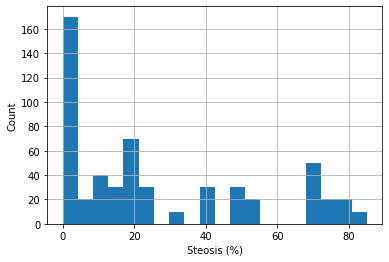

In [5]:
df['fat'].hist(bins=20)
plt.xlabel('Steosis (%)')
plt.ylabel('Count')
plt.show()

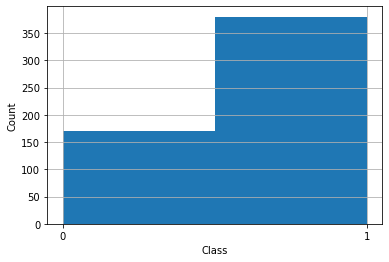

In [6]:
df['class'].hist(bins=2)
plt.xlabel('Class')
plt.ylabel('Count')
plt.locator_params(axis='x', integer=True)
plt.show()

## Step 2:  See Samples of US

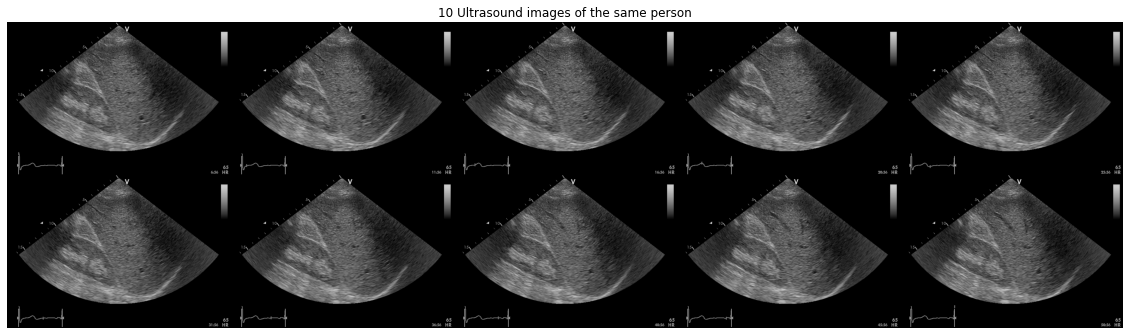

In [7]:
my_img_grid = df['img'].iloc[0].view(1,1,434,636)
for i in range(1,10):
  # my_img_grid[i,None] = df['img'].iloc[i]
  my_img_grid = torch.cat([my_img_grid,df['img'].iloc[i].view(1,1,434,636)])

def imshow(img):
    plt.figure(figsize=(20,20))
    plt.axis("off")
    plt.title("10 Ultrasound images of the same person")
    #img = img / 2 + 0.5     # unnormalize
    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(my_img_grid.type(torch.int), nrow=5))
# print( "The shape of the images is", images.shape)